In [6]:
#cd 'BC-MRI-AE/Colab Notebooks'

In [4]:
import os
import numpy as np
import ants
import pandas as pd

In [10]:
#pd.read_csv('../Data/Abide-Phenotypic_V1_0b.csv')
df = pd.read_csv('../Data/ABIDE_legend_S982.csv')

In [26]:
fmri_dir = '../../fMRI_InData/abide_bids/'
folders = [f for f in os.listdir(fmri_dir) if 'sub-' in f]
folders.sort()
folders = np.array(folders)

In [19]:
has_segment = np.array([os.path.exists(f'{fmri_dir}{sub}/anat/c1{sub}_T1w.nii') for sub in folders])
has_anat = np.array([os.path.exists(f'{fmri_dir}{sub}/anat/{sub}_T1w.nii') for sub in folders])
print(has_segment.sum())
print(has_anat.sum())

1091
1099


In [23]:
folders[0]

'sub-001'

In [46]:
dropped = np.array([folder not in df['BIDS_ID'].values for folder in folders])

In [48]:
folders[dropped].shape

(127,)

In [50]:
dropped_subs = folders[dropped]

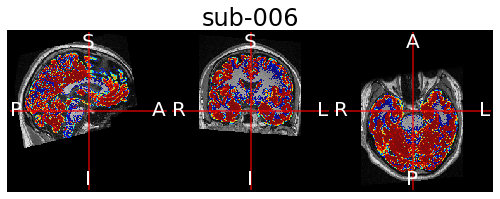

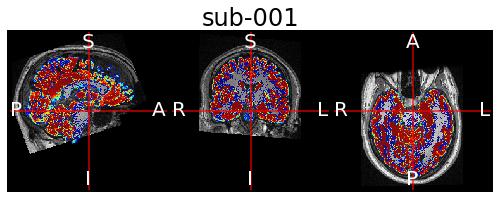

In [82]:
sub = folders[5]
im = ants.image_read(f'{fmri_dir}{sub}/anat/{sub}_T1w.nii')
im2 = ants.image_read(f'{fmri_dir}{sub}/anat/c1{sub}_T1w.nii')
im.plot_ortho(im2,flat=True,xyz_lines=True,title=sub)

sub = folders[0]
im = ants.image_read(f'{fmri_dir}{sub}/anat/{sub}_T1w.nii')
im2 = ants.image_read(f'{fmri_dir}{sub}/anat/c1{sub}_T1w.nii')
im.plot_ortho(im2,flat=True,xyz_lines=True,title=sub)

In [79]:
from tqdm import tqdm

In [95]:
#len(folders[has_anat])
len(folders[has_segment])

#np.array([dropped_sub in folders[has_anat] for dropped_sub in dropped_subs]).sum()

1091

In [104]:
failed_extract = np.array([dropped_sub in folders[has_segment] for dropped_sub in dropped_subs])
failed_extract = dropped_subs[failed_extract]

In [109]:
len(failed_extract)

109

In [136]:
good_vec = []
for sub in tqdm(df['BIDS_ID'].values[0:100]):
    im = ants.image_read(f'{fmri_dir}{sub}/anat/{sub}_T1w.nii')
    im = im.iMath_normalize()
    im2 = ants.image_read(f'{fmri_dir}{sub}/anat/c1{sub}_T1w.nii')
    good_vec.append(im.numpy()[im2.numpy()>.8].sum())


100%|██████████| 100/100 [00:45<00:00,  2.21it/s]


In [137]:
bad_vec = []
for sub in tqdm(failed_extract):
    im = ants.image_read(f'{fmri_dir}{sub}/anat/{sub}_T1w.nii')
    im = im.iMath_normalize()
    im2 = ants.image_read(f'{fmri_dir}{sub}/anat/c1{sub}_T1w.nii')
    bad_vec.append(im.numpy()[im2.numpy()>.8].sum())


100%|██████████| 109/109 [00:48<00:00,  2.26it/s]


In [145]:
max(bad_vec)

2148.8743

In [150]:
np.array(good_vec).mean()

155319.83

(array([105.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.     ,  214.88742,  429.77484,  644.6623 ,  859.5497 ,
        1074.4371 , 1289.3246 , 1504.212  , 1719.0994 , 1933.9868 ,
        2148.8743 ], dtype=float32),
 <a list of 10 Patch objects>)

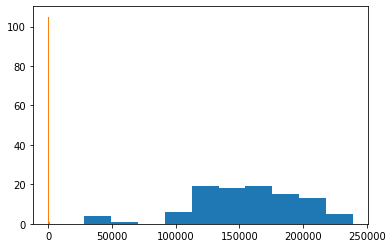

In [142]:
from matplotlib import pyplot as plt
plt.hist(good_vec)
plt.hist(bad_vec)

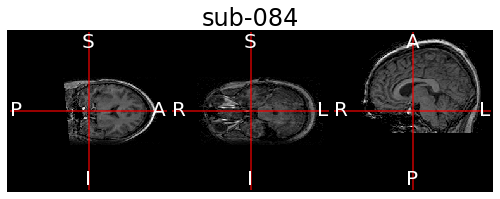

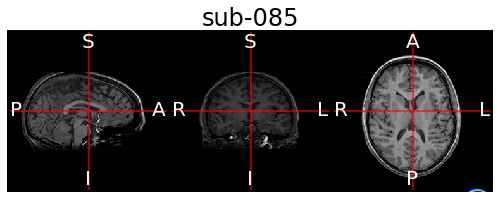

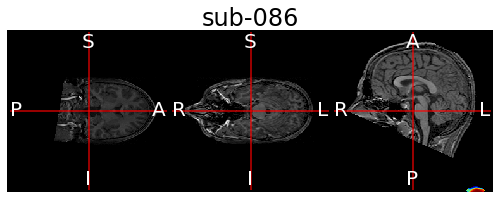

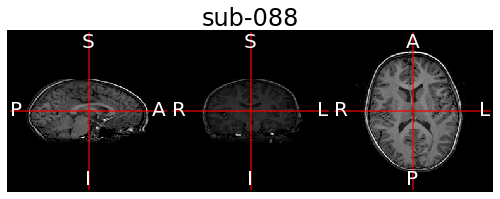

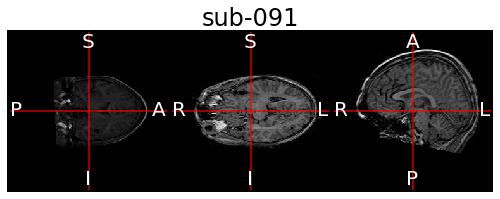

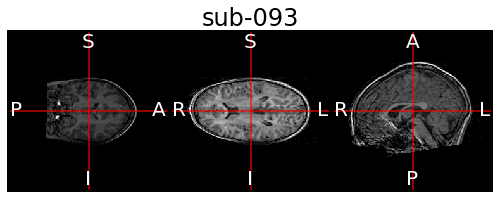

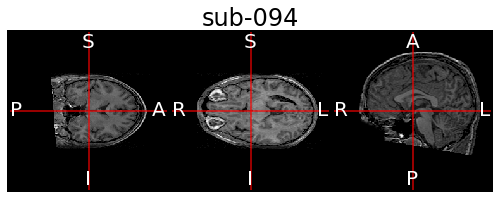

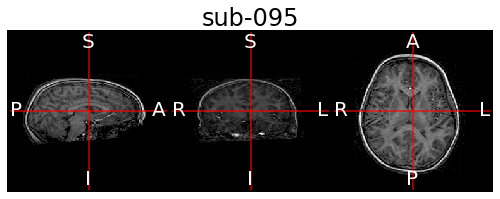

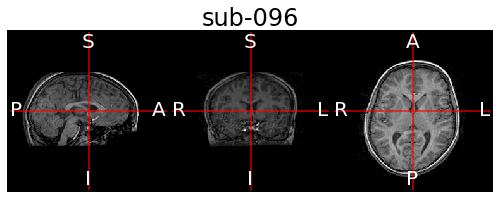

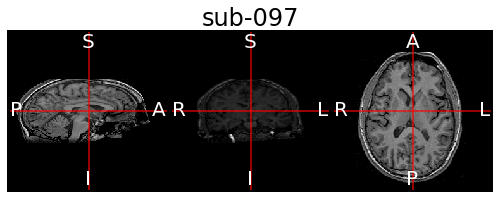

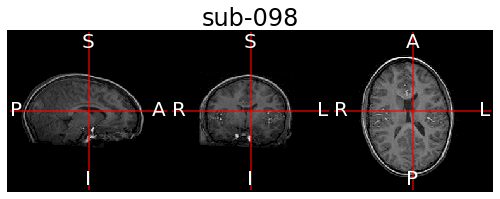

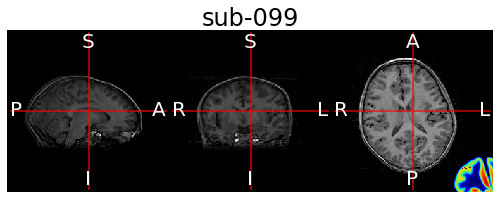

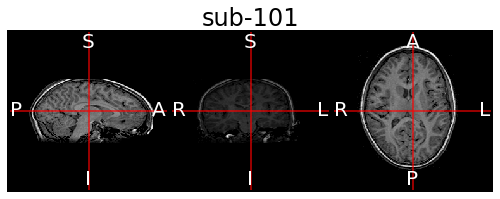

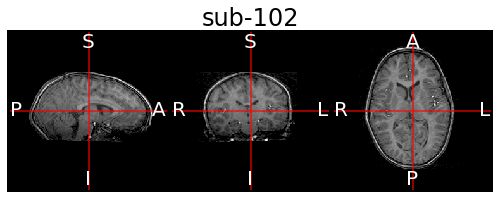

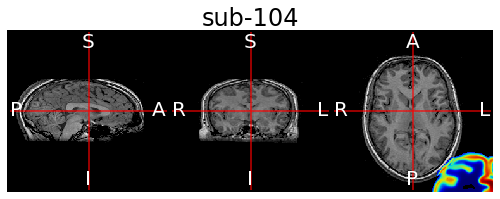

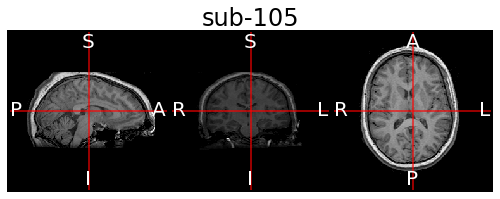

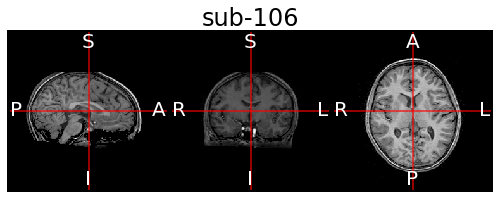

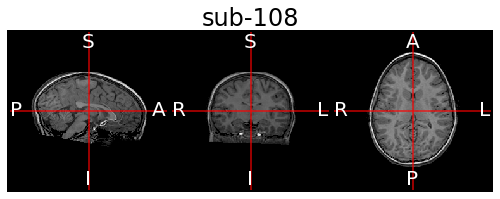

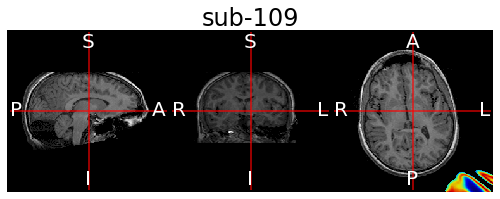

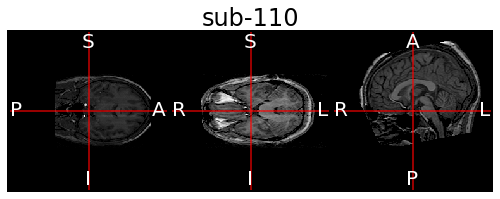

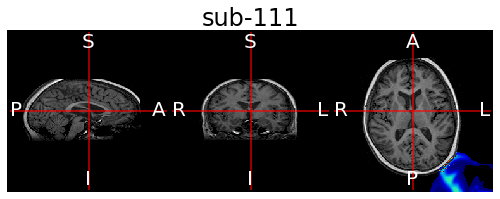

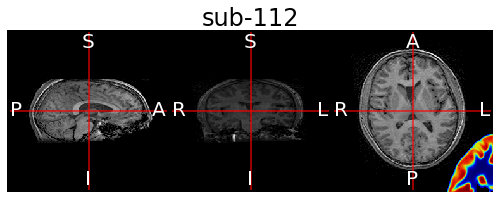

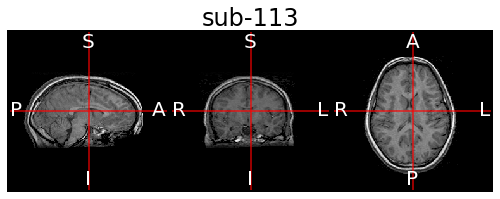

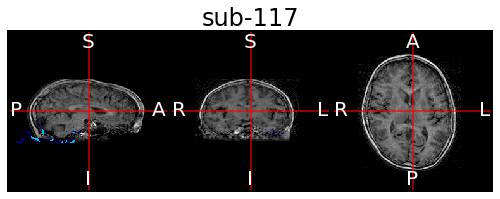

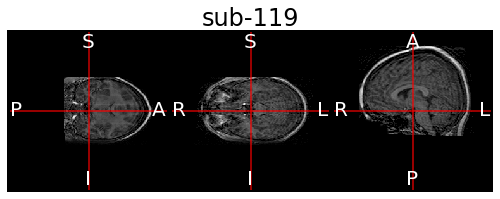

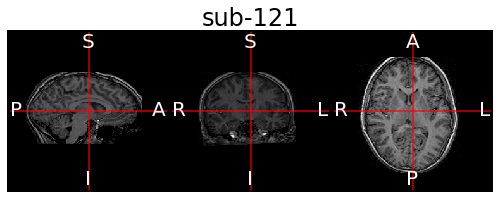

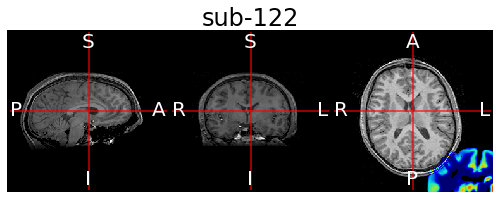

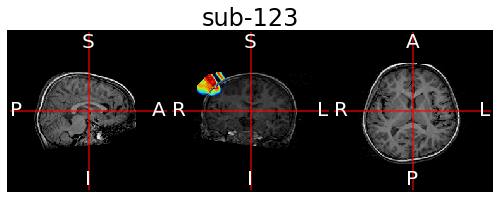

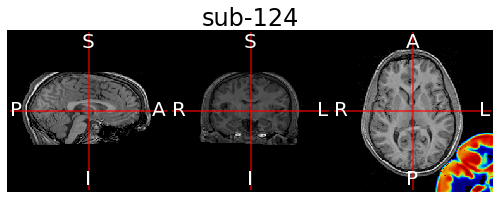

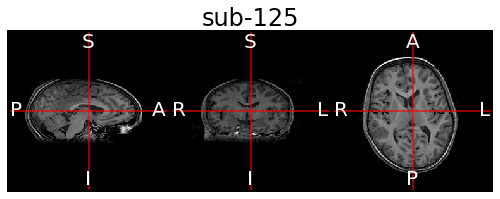

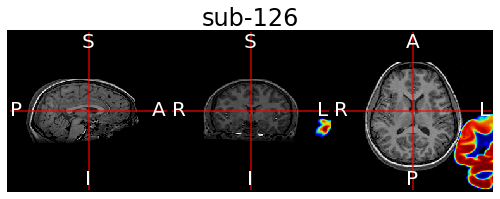

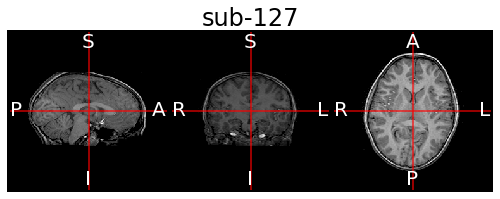

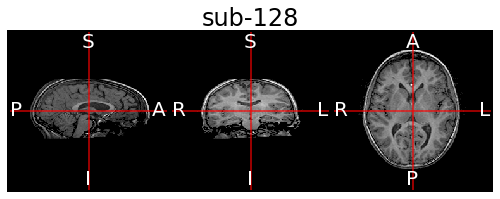

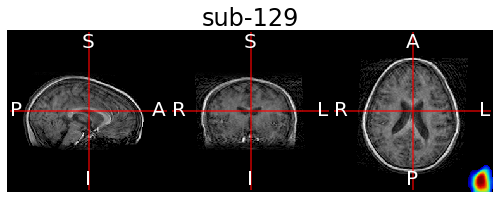

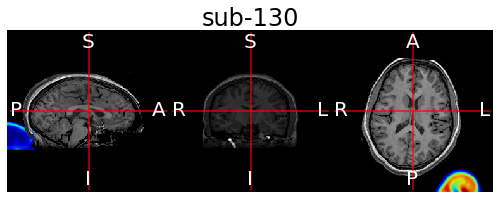

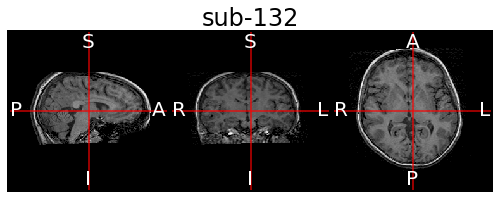

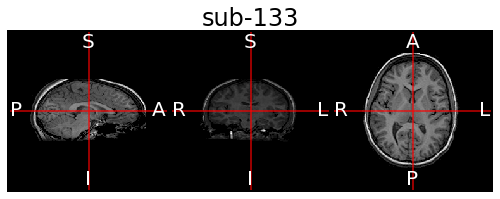

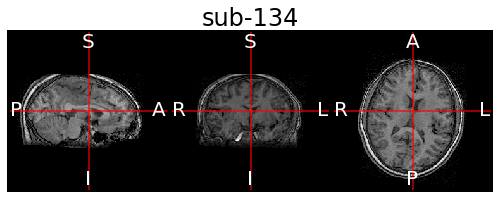

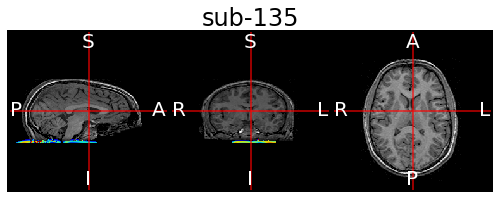

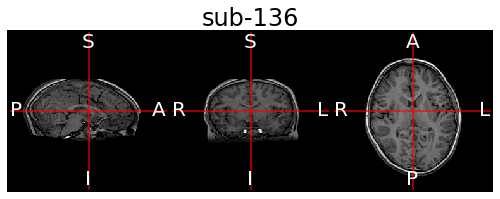

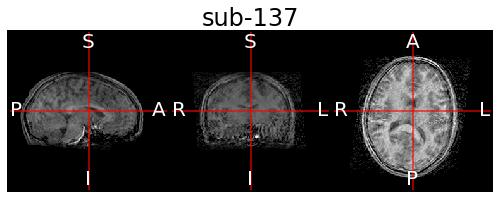

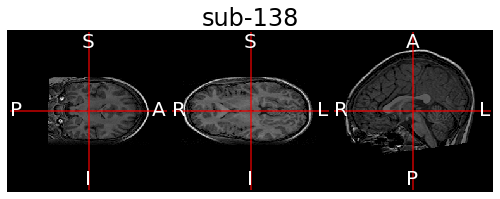

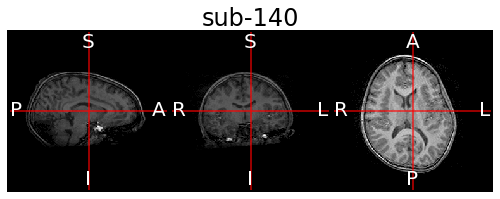

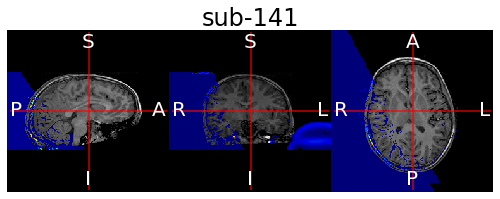

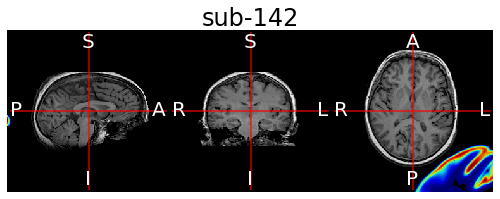

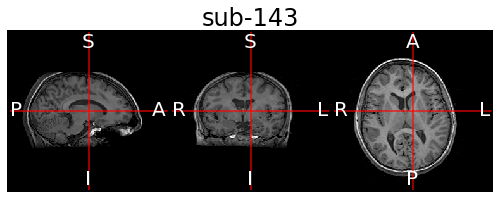

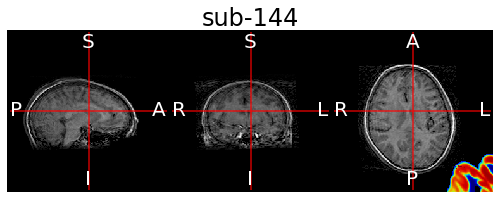

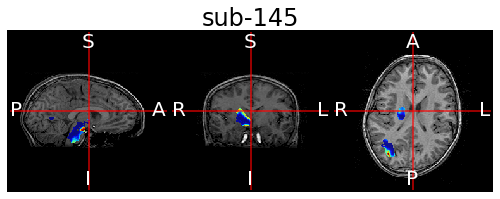

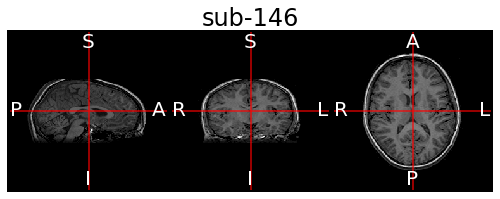

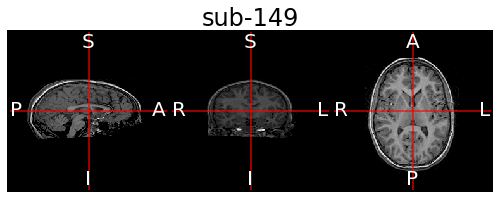

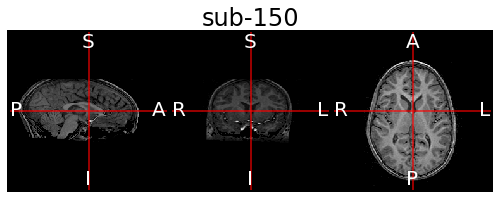

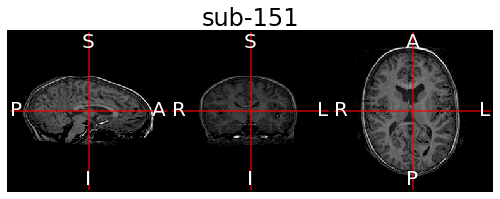

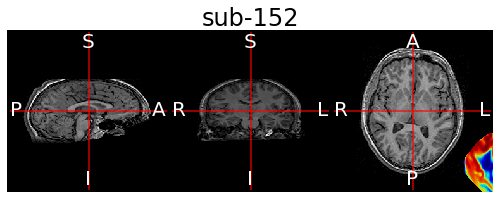

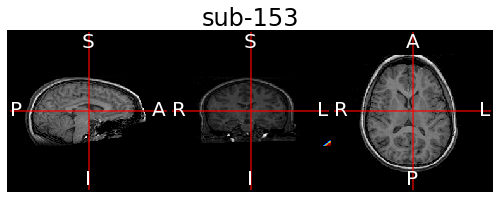

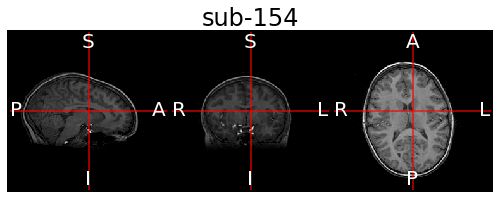

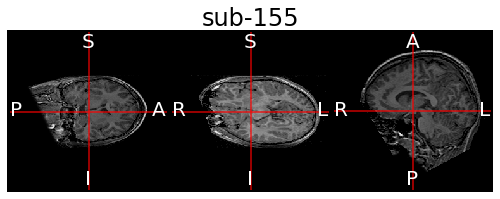

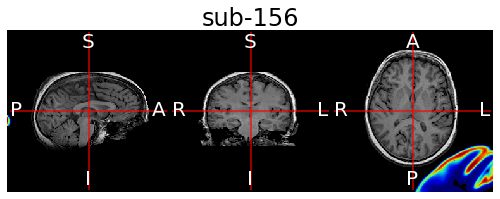

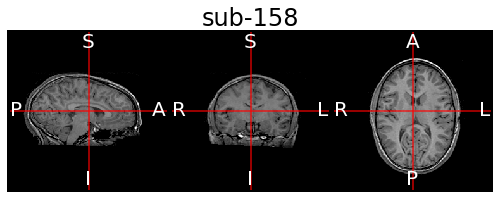

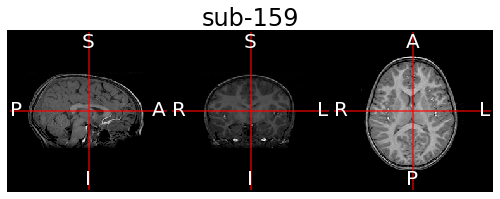

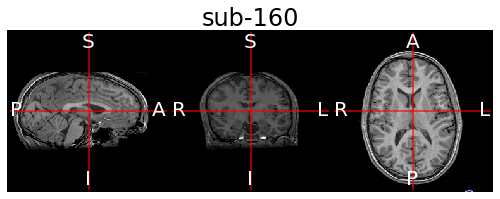

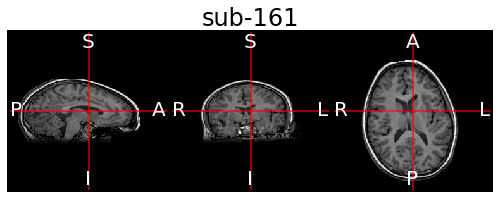

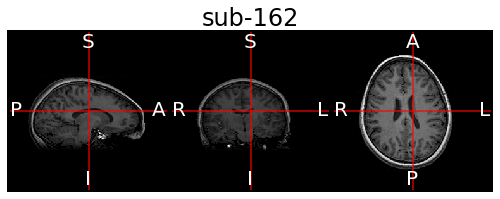

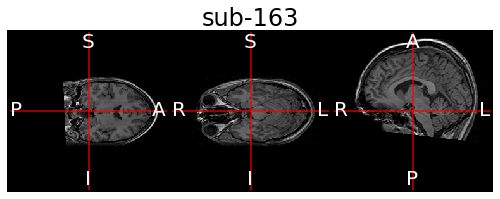

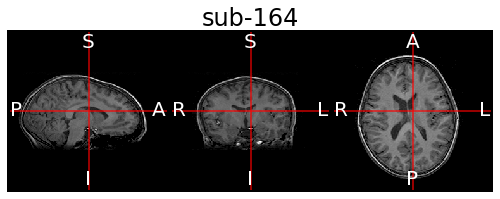

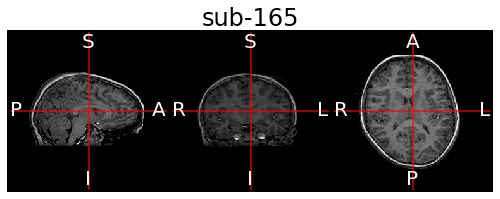

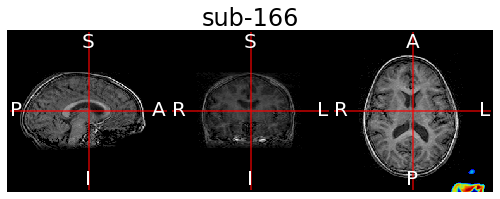

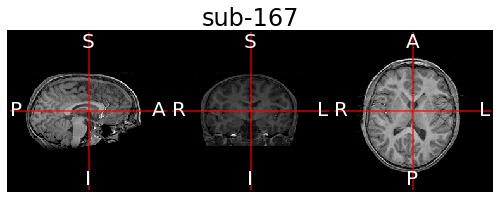

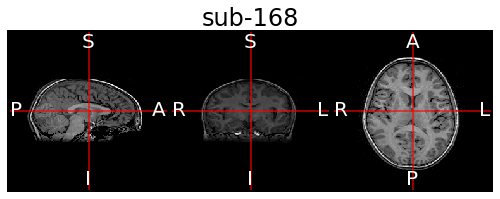

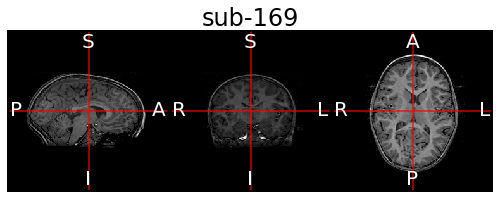

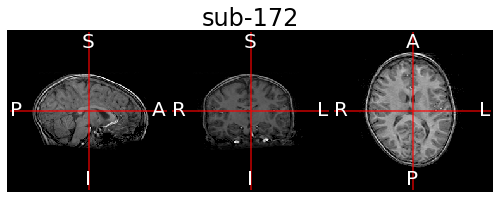

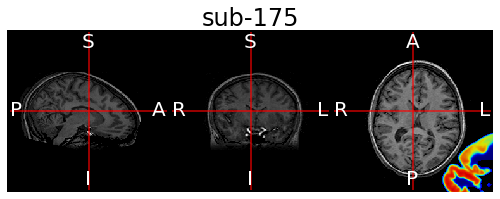

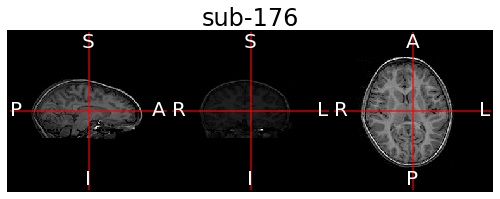

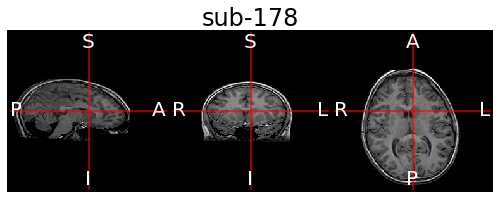

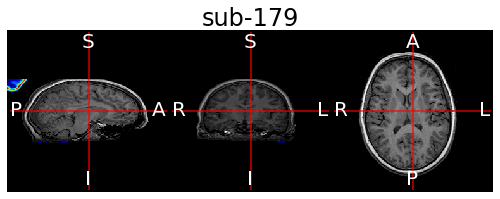

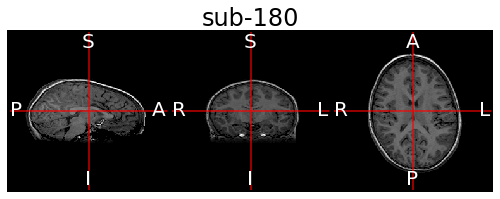

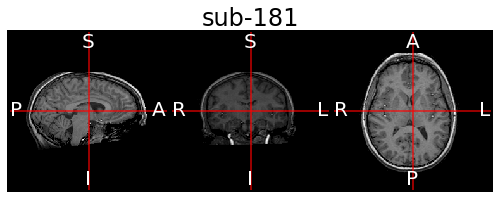

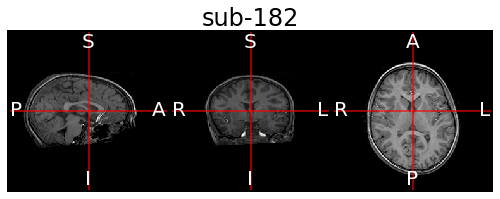

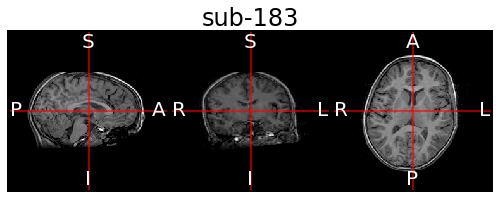

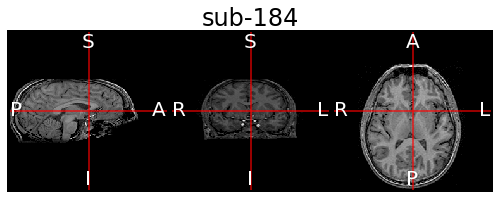

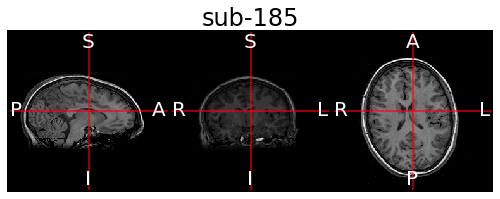

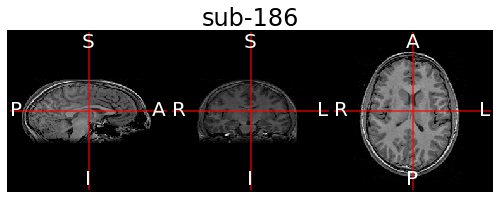

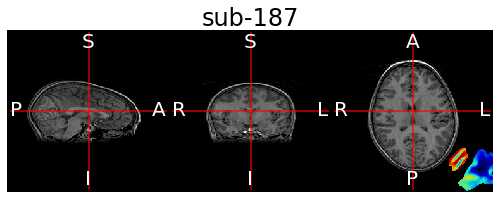

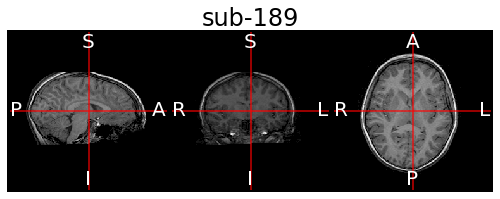

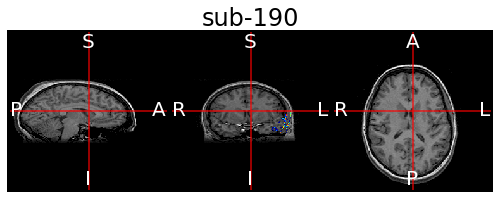

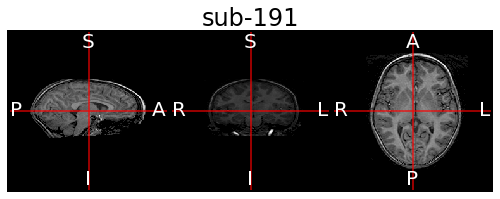

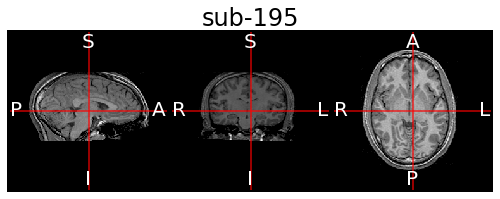

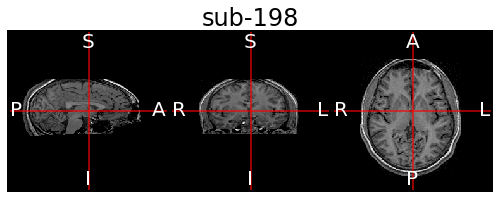

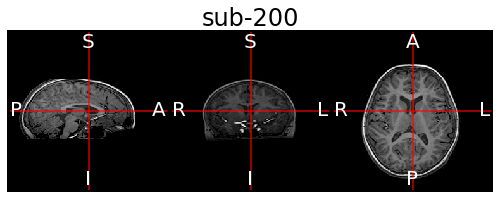

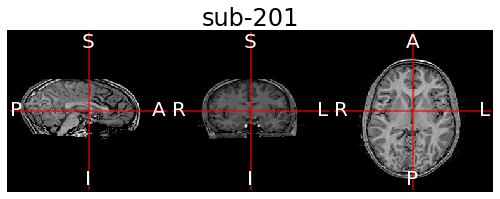

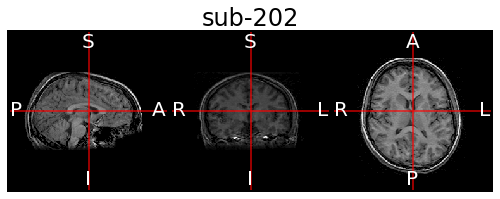

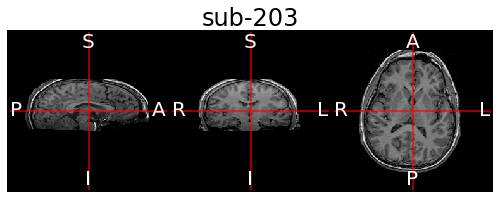

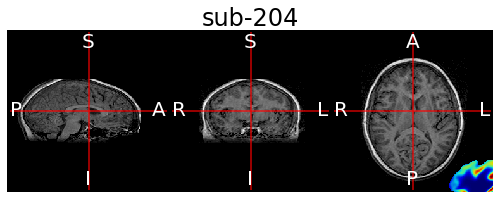

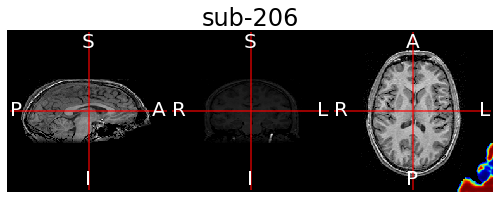

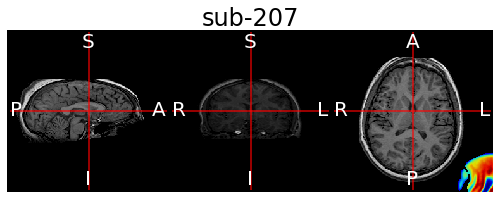

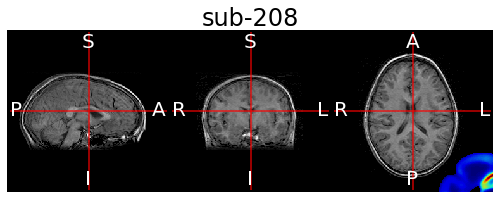

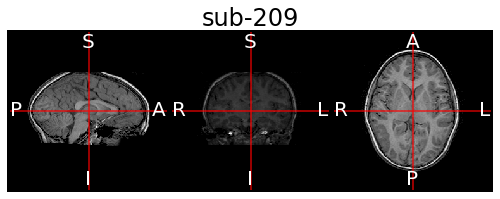

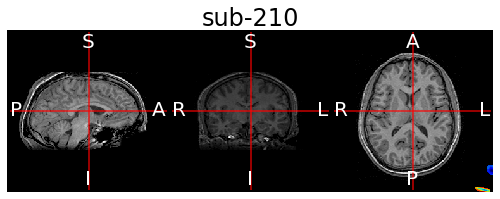

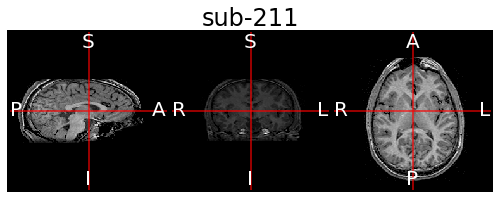

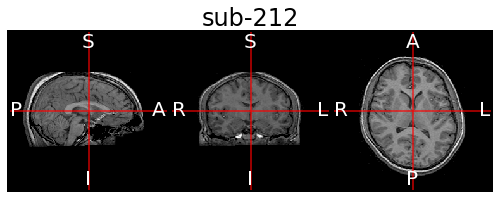

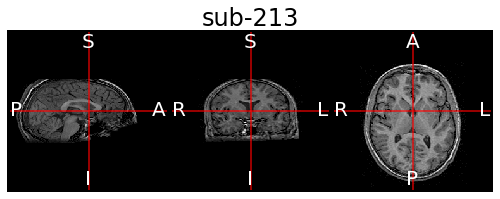

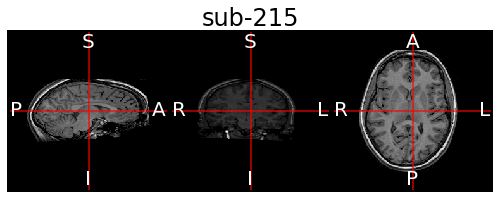

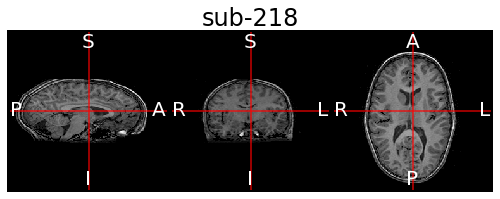

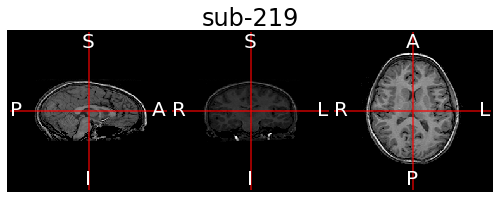

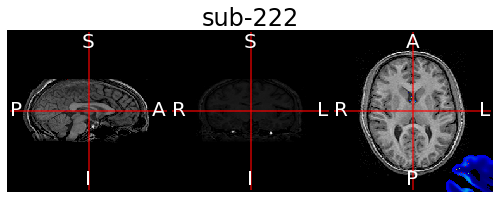

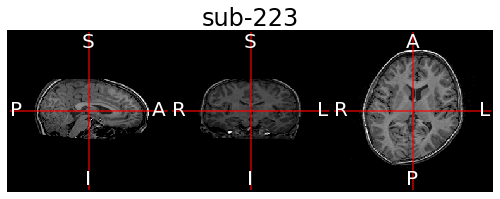

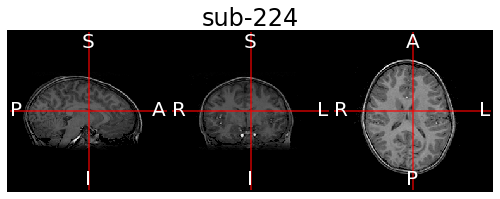

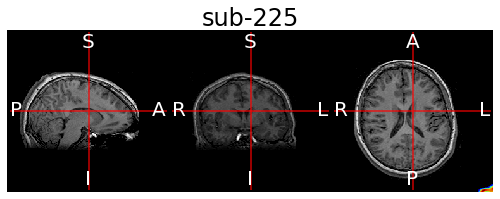

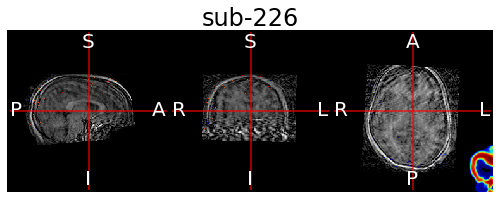

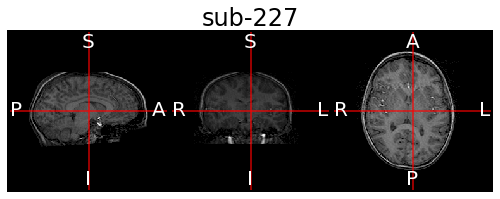

In [105]:
crashed = list()
for sub in failed_extract:
    try:
        im = ants.image_read(f'{fmri_dir}{sub}/anat/{sub}_T1w.nii')
        im2 = ants.image_read(f'{fmri_dir}{sub}/anat/c1{sub}_T1w.nii')
        im.plot_ortho(im2,flat=True,xyz_lines=True,title=sub)
    except:
        crashed.append(sub)